In [1]:
import pandas as pd

In [11]:
from sweep import load_raw_results
df = load_raw_results("results/methods")

In [12]:
df.head()

,dataset_path,dataset_slug,sweep_mode,seed,ds_compute_time,gg_compute_time,precomputation_time,combination_id,ds_method,gg_solution_compute_time,...,attractor_y,prediction_rmse,cosine_dissimilarity,dtw_distance_mean,dtw_distance_std,distance_to_attractor_mean,distance_to_attractor_std,trajectory_length_mean,trajectory_length_std,n_simulations
0,dataset/stitching/2d_large,dataset__stitching__2d_large,standard,1,12.660776,0.116847,0.000003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dataset/stitching/2d_large,dataset__stitching__2d_large,standard,1,0.050101,NaN,NaN,0.0,chain,0.006833,...,3.646510,0.049853,0.139451,209.773856,21.019748,0.009956,2.960282e-06,1778.333333,2.494438,3.0
2,dataset/stitching/2d_large,dataset__stitching__2d_large,standard,1,0.014194,NaN,NaN,1.0,chain,0.005270,...,3.579545,0.048709,0.092170,284.258774,22.250019,0.009977,1.297340e-05,1958.333333,11.440668,3.0
3,dataset/stitching/2d_large,dataset__stitching__2d_large,standard,1,1.831803,NaN,NaN,2.0,chain,0.007642,...,3.823052,0.223055,0.204028,432.702818,6.938942,0.009991,5.009770e-07,4148.666667,6.847546,3.0
4,dataset/stitching/2d_large,dataset__stitching__2d_large,standard,1,0.035360,NaN,NaN,3.0,chain,0.006020,...,7.483766,0.199147,0.126617,459.907424,19.931607,0.009949,4.857888e-06,2304.666667,2.054805,3.0


In [13]:
df.dataset_slug.unique()

array(['dataset__stitching__2d_large', 'dataset__stitching__X',
       'dataset__stitching__pcgmm_3d_workspace_simple'], dtype=object)

In [20]:
slug = "dataset__stitching__X"
# Raw per-trajectory results (only successful runs)
subset = df[df.dataset_slug == slug]
cols = ["prediction_rmse", "cosine_dissimilarity", "dtw_distance_mean", "ds_method", "seed", "trajectory_length_mean"]
means = subset[cols].groupby("ds_method").mean().reset_index()

# Fail percentage from sweep summary (has one row per run, including failures)
summary = pd.read_csv("results/methods/sweep_results.csv")
summary_sub = summary[summary.dataset_slug == slug]
fail_pct = summary_sub.groupby("ds_method")["status"].apply(lambda x: (x != "ok").mean() * 100).rename("fail_pct")

means = means.merge(fail_pct, on="ds_method", how="outer")
means

,ds_method,prediction_rmse,cosine_dissimilarity,dtw_distance_mean,seed,trajectory_length_mean,fail_pct
0,chain,0.187582,0.161859,1991.080897,1.5,3288.994444,0.0
1,sp_recompute_all,0.093875,0.124015,2432.417481,1.5,2437.255556,0.0
2,sp_recompute_ds,0.080865,0.091354,3663.213991,1.5,2980.500000,0.0
3,lpv-ds_recompute_all,NaN,NaN,NaN,NaN,NaN,100.0
4,lpv-ds_recompute_ds,NaN,NaN,NaN,NaN,NaN,100.0


In [ ]:
df[df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "ds_method", "seed", "duration_s"]].groupby("ds_method").mean().reset_index()

,ds_method,prediction_rmse_mean,cosine_dissimilarity_mean,dtw_distance_mean,seed,duration_s
0,chain,0.094090,0.176643,1390.871731,1.5,60.882583
1,sp_recompute_all,0.079708,0.093384,2597.561521,1.5,55.856912
2,sp_recompute_ds,0.080336,0.102246,2185.788919,1.5,62.690241


# Ablations

In [ ]:
chain_method_df = pd.read_csv("results/chain_trigger/sweep_results.csv")
table = chain_method_df[chain_method_df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "chain_transition_trigger_method", "chain_ds_method", "duration_s"]].groupby(["chain_transition_trigger_method", "chain_ds_method"]).mean().reset_index()
print(table.to_markdown(index=False))

In [ ]:
graph_params_df = pd.read_csv("results/sweep_graph_params/sweep_results.csv")
# TODO adjust to more datasets
table = graph_params_df[graph_params_df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "param_dist_value", "param_cos_value", "duration_s"]].groupby(["param_dist_value", "param_cos_value"]).mean().reset_index()
print(table.to_markdown(index=False))

In [ ]:
df_chain_test = load_raw_results("results/chain_trigger_test")

In [33]:
df_chain_test.head()

,dataset_path,dataset_slug,sweep_mode,seed,ds_compute_time,gg_compute_time,precomputation_time,combination_id,ds_method,gg_solution_compute_time,...,cosine_dissimilarity,dtw_distance_mean,dtw_distance_std,distance_to_attractor_mean,distance_to_attractor_std,trajectory_length_mean,trajectory_length_std,n_simulations,chain_ds_method,chain_trigger_method
0,dataset/stitching/2d_large,dataset__stitching__2d_large,chain_trigger,1,12.105589,0.097557,0.000002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,linear,mean_normals
1,dataset/stitching/2d_large,dataset__stitching__2d_large,chain_trigger,1,0.019879,NaN,NaN,0.0,chain,0.009190,...,0.189908,384.104750,0.559493,0.009967,2.872800e-06,2435.000000,5.887841,3.0,linear,mean_normals
2,dataset/stitching/2d_large,dataset__stitching__2d_large,chain_trigger,1,0.000614,NaN,NaN,1.0,chain,0.005414,...,0.216707,514.042109,1.713571,0.009975,1.130075e-05,2465.333333,5.185450,3.0,linear,mean_normals
3,dataset/stitching/2d_large,dataset__stitching__2d_large,chain_trigger,1,0.005537,NaN,NaN,2.0,chain,0.005488,...,0.179646,2407.596635,7.551669,0.009997,2.074374e-06,9621.000000,2.828427,3.0,linear,mean_normals
4,dataset/stitching/2d_large,dataset__stitching__2d_large,chain_trigger,1,0.011465,NaN,NaN,3.0,chain,0.011036,...,0.244346,1842.396764,4.073083,0.009997,3.281214e-07,4379.333333,9.463380,3.0,linear,mean_normals


In [34]:
df_chain_test[df_chain_test.dataset_slug == "dataset__stitching__X"][["prediction_rmse", "cosine_dissimilarity", "dtw_distance_mean", "chain_ds_method"]].groupby(["chain_ds_method"]).mean().reset_index()

,chain_ds_method,prediction_rmse,cosine_dissimilarity,dtw_distance_mean
0,linear,0.101533,0.229877,2062.412382
1,segmented,0.293811,0.193732,1509.144680


In [37]:
slug = "dataset__stitching__X"
# Raw per-trajectory results (only successful runs)
subset = df_chain_test[df_chain_test.dataset_slug == slug]
cols = ["prediction_rmse", "cosine_dissimilarity", "dtw_distance_mean", "chain_ds_method", "seed", "trajectory_length_mean"]
means = subset[cols].groupby("chain_ds_method").mean().reset_index()

# Fail percentage from sweep summary (has one row per run, including failures)
summary = pd.read_csv("results/chain_trigger_test/sweep_results.csv")
summary_sub = summary[summary.dataset_slug == slug]
fail_pct = summary_sub.groupby("chain_ds_method")["status"].apply(lambda x: (x != "ok").mean() * 100).rename("fail_pct")

means = means.merge(fail_pct, on="chain_ds_method", how="outer")
means

,chain_ds_method,prediction_rmse,cosine_dissimilarity,dtw_distance_mean,seed,trajectory_length_mean,fail_pct
0,linear,0.101533,0.229877,2062.412382,1.5,4658.044444,0.0
1,segmented,0.293811,0.193732,1509.144680,1.5,2482.601190,0.0


In [94]:
graph_param_df = pd.read_csv("results/sweep_graph_params/sweep_results.csv")
len(graph_param_df)

54

In [96]:
graph_param_df.head()

,dataset_path,dataset_slug,sweep_mode,ds_method,chain_ds_method,chain_transition_trigger_method,chain_blend_length_ratio,param_dist,param_cos,rel_scale,...,results_csv_source,n_result_rows,n_eval_rows,prediction_rmse_mean,cosine_dissimilarity_mean,dtw_distance_mean,distance_to_attractor_mean,ds_compute_time_mean,gg_compute_time_mean,total_compute_time_mean
0,dataset/stitching/X,dataset__stitching__X,graph_params,sp_recompute_ds,NaN,NaN,NaN,1.0,1.0,NaN,...,results/sweep_graph_params/raw_results/dataset...,31,30,0.081177,0.109014,3152.892353,0.277960,0.208281,NaN,0.213219
1,dataset/stitching/X,dataset__stitching__X,graph_params,sp_recompute_ds,NaN,NaN,NaN,1.0,1.0,NaN,...,results/sweep_graph_params/raw_results/dataset...,31,30,0.079296,0.089673,1439.120476,0.009955,0.129483,NaN,0.133035
2,dataset/stitching/X,dataset__stitching__X,graph_params,sp_recompute_ds,NaN,NaN,NaN,1.0,1.0,NaN,...,results/sweep_graph_params/raw_results/dataset...,31,30,0.081619,0.097672,2408.039758,0.018490,0.077380,NaN,0.082194
3,dataset/stitching/X,dataset__stitching__X,graph_params,sp_recompute_ds,NaN,NaN,NaN,1.0,2.0,NaN,...,results/sweep_graph_params/raw_results/dataset...,31,30,0.075655,0.076436,791.547737,0.009955,0.208243,NaN,0.212865
4,dataset/stitching/X,dataset__stitching__X,graph_params,sp_recompute_ds,NaN,NaN,NaN,1.0,2.0,NaN,...,results/sweep_graph_params/raw_results/dataset...,31,30,0.076228,0.083836,1352.886879,0.013415,0.044675,NaN,0.049943


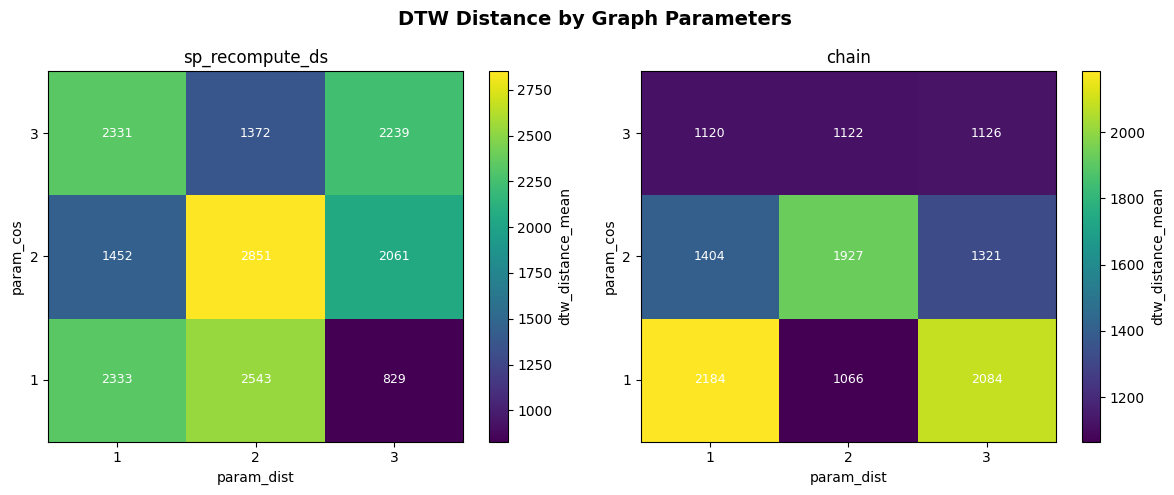

In [100]:
import matplotlib.pyplot as plt
import numpy as np

ds_methods = graph_param_df["ds_method"].unique()

fig, axes = plt.subplots(1, len(ds_methods), figsize=(6 * len(ds_methods), 5))
if len(ds_methods) == 1:
    axes = [axes]

for ax, method in zip(axes, ds_methods):
    subset = graph_param_df[graph_param_df["ds_method"] == method]
    # subset = subset[subset.seed == 2]
    subset = subset[subset["dtw_distance_mean"] <= 10000]
    pivot = subset.groupby(["param_dist", "param_cos"])["dtw_distance_mean"].mean().reset_index()
    pivot = pivot.pivot(index="param_cos", columns="param_dist", values="dtw_distance_mean")

    im = ax.imshow(pivot.values, origin="lower", aspect="auto", cmap="viridis")
    ax.set_xticks(range(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns.astype(int))
    ax.set_yticks(range(len(pivot.index)))
    ax.set_yticklabels(pivot.index.astype(int))
    ax.set_xlabel("param_dist")
    ax.set_ylabel("param_cos")
    ax.set_title(f"{method}")

    # annotate cells
    for i in range(len(pivot.index)):
        for j in range(len(pivot.columns)):
            ax.text(j, i, f"{pivot.values[i, j]:.0f}", ha="center", va="center", color="white", fontsize=9)

    fig.colorbar(im, ax=ax, label="dtw_distance_mean")

fig.suptitle("DTW Distance by Graph Parameters", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [101]:
import glob, os, re

pattern = "results/sweep_chain_trigger/figures/**/results_*.csv"
all_files = sorted(glob.glob(pattern, recursive=True))

dfs = []
for f in all_files:
    parts = f.split(os.sep)
    fig_idx = parts.index("figures")
    dataset_slug = parts[fig_idx + 1]
    seed = int(parts[fig_idx + 3].split("_")[1])
    run_name = parts[fig_idx + 4]

    m = re.search(r"chain_ds_(\w+)__trigger_(\w+)", run_name)
    if not m:
        continue
    chain_ds_method = m.group(1)
    trigger_method = m.group(2)

    tmp = pd.read_csv(f)
    tmp["dataset_slug"] = dataset_slug
    tmp["seed"] = seed
    tmp["chain_ds_method"] = chain_ds_method
    tmp["trigger_method"] = trigger_method
    tmp["method_label"] = f"{chain_ds_method} / {trigger_method}"
    dfs.append(tmp)

chain_detail_df = pd.concat(dfs, ignore_index=True)
print(f"Loaded {len(chain_detail_df)} rows from {len(all_files)} files")
print(f"Datasets: {chain_detail_df['dataset_slug'].unique()}")
print(f"Methods:  {chain_detail_df['method_label'].unique()}")

Loaded 960 rows from 32 files
Datasets: ['dataset__stitching__X']
Methods:  ['linear / distance_ratio' 'linear / mean_normals'
 'segmented / distance_ratio' 'segmented / mean_normals']


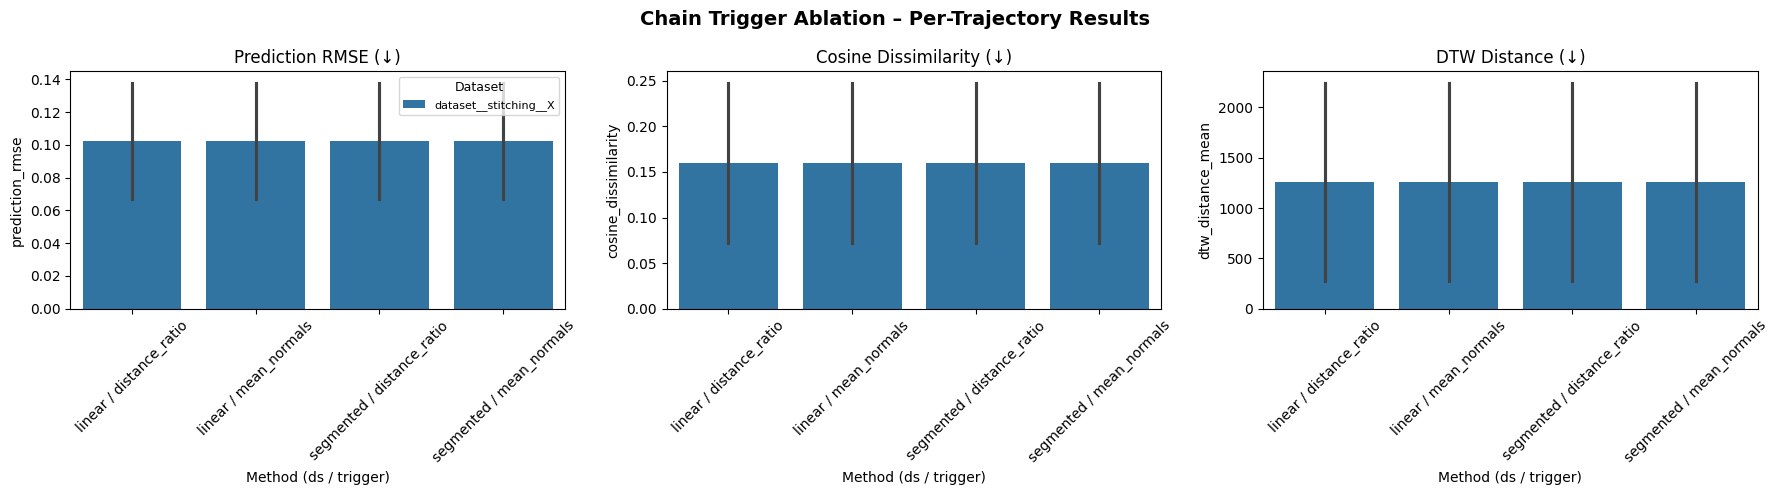

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = [
    ("prediction_rmse", "Prediction RMSE (↓)"),
    ("cosine_dissimilarity", "Cosine Dissimilarity (↓)"),
    ("dtw_distance_mean", "DTW Distance (↓)"),
]

datasets = chain_detail_df["dataset_slug"].unique()

fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 5), squeeze=False)

for col_idx, (metric, title) in enumerate(metrics):
    ax = axes[0][col_idx]
    sns.barplot(
        data=chain_detail_df,
        x="method_label",
        y=metric,
        hue="dataset_slug",
        ax=ax,
        errorbar="sd",
    )
    ax.set_title(title)
    ax.tick_params(axis="x", rotation=45)
    ax.set_xlabel("Method (ds / trigger)")
    ax.set_ylabel(metric)
    if col_idx > 0:
        ax.get_legend().remove()
    else:
        ax.legend(title="Dataset", fontsize=8, title_fontsize=9)

fig.suptitle("Chain Trigger Ablation – Per-Trajectory Results", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [47]:
chain_blend_df = pd.read_csv("results/sweep_chain_blend/sweep_results.csv")
chain_blend_df[chain_blend_df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "chain_blend_length_ratio", "seed", "duration_s"]].groupby(["chain_blend_length_ratio"]).mean().reset_index()

,chain_blend_length_ratio,prediction_rmse_mean,cosine_dissimilarity_mean,dtw_distance_mean,seed,duration_s
0,0.00,0.222633,0.175862,746.218384,1.5,133.222815
1,0.25,0.286064,0.201940,1245.200437,1.5,149.195576
2,0.50,0.423346,0.263018,1910.013124,1.5,110.279131
3,0.75,0.224953,0.166423,882.448481,1.5,79.353099
4,1.00,0.173189,0.165837,704.943119,1.5,127.682620


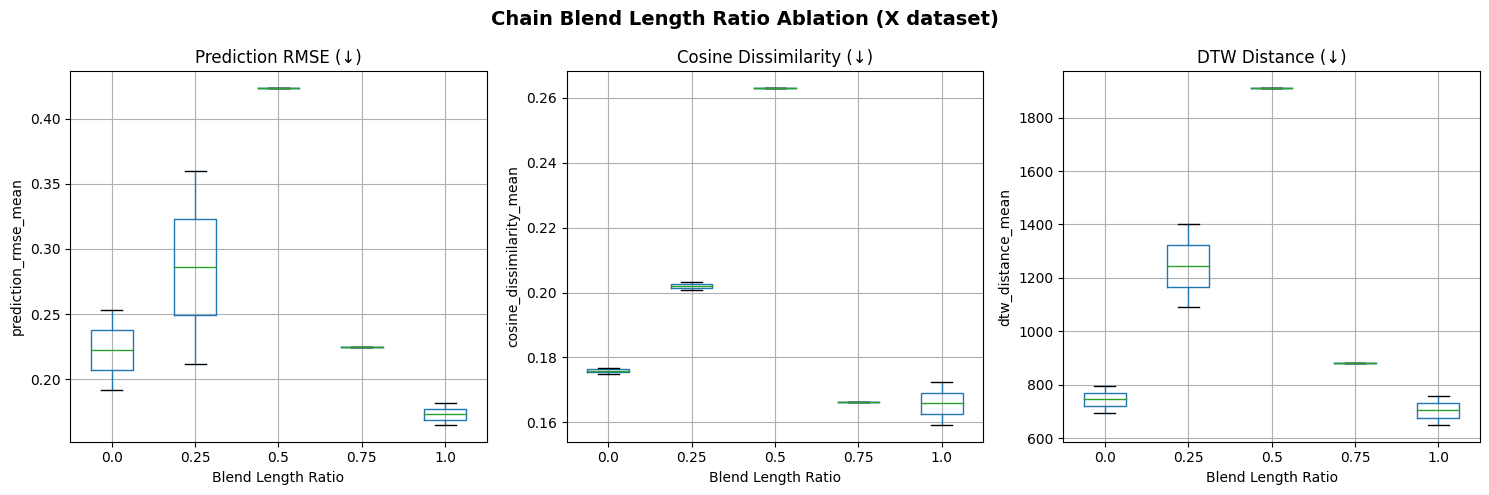

In [48]:
import matplotlib.pyplot as plt

blend_data = chain_blend_df[chain_blend_df.dataset_slug == "dataset__stitching__X"][
    ["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "chain_blend_length_ratio", "duration_s"]
]

metrics = [
    ("prediction_rmse_mean", "Prediction RMSE (↓)"),
    ("cosine_dissimilarity_mean", "Cosine Dissimilarity (↓)"),
    ("dtw_distance_mean", "DTW Distance (↓)"),
]

fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
for ax, (col, title) in zip(axes, metrics):
    blend_data.boxplot(column=col, by="chain_blend_length_ratio", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Blend Length Ratio")
    ax.set_ylabel(col)

fig.suptitle("Chain Blend Length Ratio Ablation (X dataset)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [ ]:
baseline_df = pd.read_csv("results/chain_test_base_001/sweep_results.csv")
baseline_df[baseline_df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "chain_blend_length_ratio", "seed", "duration_s"]].groupby(["chain_blend_length_ratio"]).mean().reset_index()

In [ ]:
baseline_df = pd.read_csv("results/chain_test_base_001/sweep_results.csv")
baseline_df[baseline_df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "chain_blend_length_ratio", "seed", "duration_s"]].groupby(["chain_blend_length_ratio"]).mean().reset_index()

# Early results

In [101]:
import pandas as pd 

seeds = [42, 100, 3215, 21]

dfs = []
for seed in seeds:
    df1 = pd.read_csv(f"./dataset/stitching/testing/figures/reuse/results_{seed}.csv")
    df2 = pd.read_csv(f"./dataset/stitching/testing/figures/recompute_all/results_{seed}.csv")
    df3 = pd.read_csv(f"./dataset/stitching/testing/figures/recompute_ds/results_{seed}.csv")
    df4 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_all/results_{seed}.csv")
    df5 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_ds/results_{seed}.csv")
    df6 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_reuse/results_{seed}.csv")
    
    dfs.append(df1)
    dfs.append(df2)
    dfs.append(df3)
    dfs.append(df4)
    dfs.append(df5)
    dfs.append(df6)

df = pd.concat(dfs)
df['ds_method'] = df['ds_method'].replace({
    'reuse': 'Reuse Gauss + P',
    'recompute_all': 'Recompute All', 
    'recompute_ds': 'Reuse Gauss',
    'all_paths_all': 'Recompute All*',
    'all_paths_ds': 'Reuse Gauss*',
    'all_paths_reuse': 'Reuse Gauss + P*'
})

df['ds_method'] = pd.Categorical(df['ds_method'], 
                                categories=['Recompute All', 'Reuse Gauss', 'Reuse Gauss + P', 'Recompute All*', 'Reuse Gauss*', 'Reuse Gauss + P*'], 
                                ordered=True)

In [102]:
df.head()


,combination_id,ds_method,gg compute time,ds compute time,total compute time,initial_x,initial_y,attractor_x,attractor_y,prediction_rmse,cosine_dissimilarity,dtw_distance_mean,dtw_distance_std,distance_to_attractor_mean,distance_to_attractor_std,trajectory_length_mean,trajectory_length_std,n_simulations
0,0,Reuse Gauss + P,0.013085,1.769164,1.782253,8.836694,7.780032,4.258065,12.938312,0.085047,0.086853,7670.972933,43.489601,0.009996,3.580685e-07,15099.5,16.5,2
1,1,Reuse Gauss + P,0.012974,2.043422,2.056399,8.836694,7.780032,2.199597,2.587256,0.156074,0.124241,6665.440921,15.212105,0.009999,3.669937e-07,17597.5,165.5,2
2,2,Reuse Gauss + P,0.009230,0.000762,0.009994,8.836694,7.780032,11.469758,2.091112,0.317490,0.191363,567.329187,0.870292,0.009996,2.088425e-06,3422.0,28.0,2
3,3,Reuse Gauss + P,0.009293,0.025297,0.034591,8.836694,7.780032,4.051075,5.888799,0.065253,0.004747,25601.588754,451.030173,0.212356,3.767628e-02,30002.0,0.0,2
4,4,Reuse Gauss + P,0.009244,5.285944,5.295190,8.836694,7.780032,12.917339,12.440138,0.063316,0.108697,982.914591,2.881759,0.009997,1.520540e-06,10655.0,66.0,2


In [103]:
nan_counts = df.groupby('ds_method')['prediction_rmse'].apply(lambda x: x.isna().sum())
print(nan_counts / len(df[df["ds_method"]=="Recompute All"]))

ds_method
Recompute All       0.083333
Reuse Gauss         0.000000
Reuse Gauss + P     0.000000
Recompute All*      0.083333
Reuse Gauss*        0.000000
Reuse Gauss + P*    0.000000
Name: prediction_rmse, dtype: float64


In [105]:
nan_counts, len(df[df["ds_method"]=="Recompute All"])

(ds_method
 Recompute All       10
 Reuse Gauss          0
 Reuse Gauss + P      0
 Recompute All*      10
 Reuse Gauss*         0
 Reuse Gauss + P*     0
 Name: prediction_rmse, dtype: int64,
 120)

In [97]:
critical_columns = ['ds_method', 'cosine_dissimilarity', 'prediction_rmse', 'dtw_distance_mean']
df = df.dropna(subset=critical_columns)

In [109]:
import latex_summary
import importlib
importlib.reload(latex_summary)
metrics_cols = ['cosine_dissimilarity', 'prediction_rmse', 
                       'distance_to_attractor_mean', 'trajectory_length_mean']
latex_summary.print_summary(df, metrics_cols)

=== Statistical Summary by DS Method ===

\begin{table}[htbp]
\centering
\caption{Performance Comparison of DS Methods (Mean ± Standard Deviation)}
\label{tab:ds_method_comparison}
\begin{tabular}{lcccc}
\hline
Method & Cosine Dissimilarity & Prediction RMSE & Distance to Attractor & Trajectory Length \\
\hline
Recompute All & 0.11 ± 0.08 & 0.11 ± 0.09 & 0.02 ± 0.05 & 16366.20 ± 8090.86 \\
Reuse Gauss & 0.11 ± 0.06 & 0.11 ± 0.06 & 0.02 ± 0.04 & 15499.23 ± 6812.94 \\
Reuse Gauss + P & 0.13 ± 0.08 & 0.15 ± 0.10 & 0.05 ± 0.18 & 16571.14 ± 7207.71 \\
Recompute All* & 0.15 ± 0.08 & 0.19 ± 0.35 & 0.01 ± 0.02 & 12646.06 ± 5578.60 \\
Reuse Gauss* & 0.13 ± 0.02 & 0.11 ± 0.01 & 0.01 ± 0.00 & 14587.57 ± 6261.77 \\
Reuse Gauss + P* & 0.20 ± 0.07 & 0.19 ± 0.08 & 0.01 ± 0.00 & 14057.25 ± 6470.26 \\
\hline
\end{tabular}
\note{Lower values indicate better performance for all metrics. Values within one standard deviation of the best method are shown in bold.}
\end{table}

=== End of LaTeX Summary ===


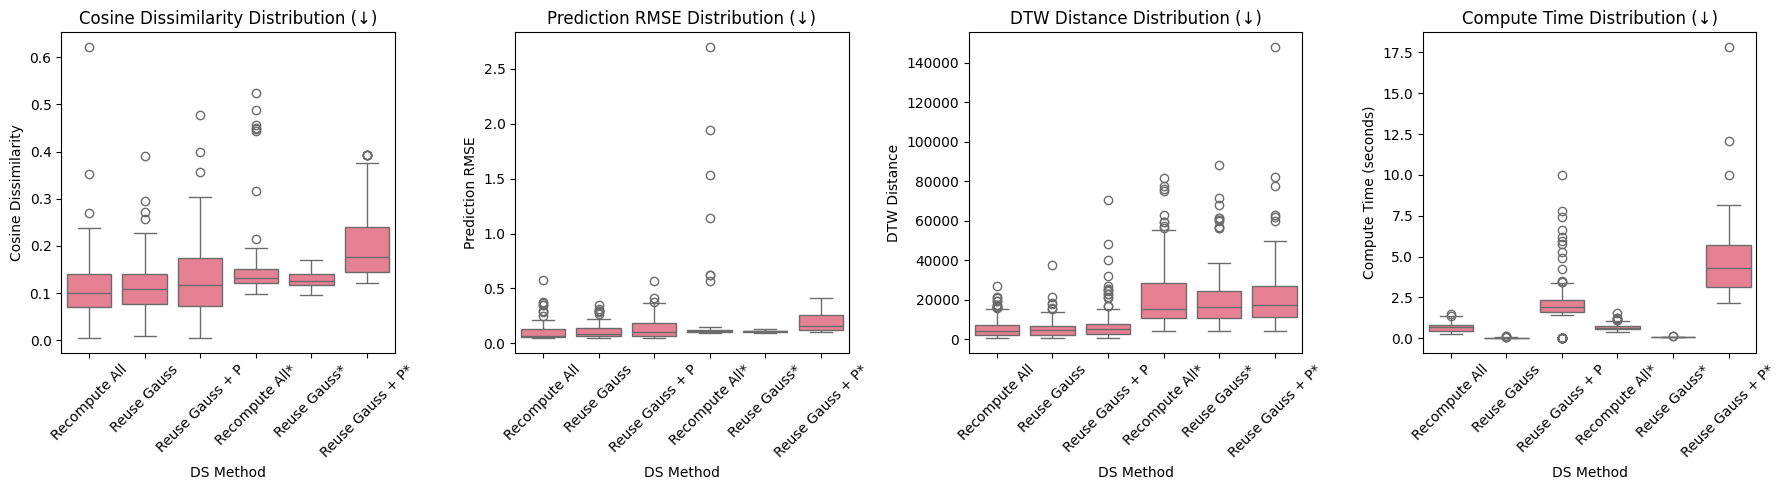

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
# fig.suptitle('Distribution Comparison Across DS Methods', fontsize=16, fontweight='bold')

# Cosine Dissimilarity box plot
sns.boxplot(data=df, x="ds_method", y="cosine_dissimilarity", ax=axes[0])
axes[0].set_title('Cosine Dissimilarity Distribution (↓)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('DS Method')
axes[0].set_ylabel('Cosine Dissimilarity')

# Prediction RMSE box plot
sns.boxplot(data=df, x="ds_method", y="prediction_rmse", ax=axes[1])
axes[1].set_title('Prediction RMSE Distribution (↓)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('DS Method')
axes[1].set_ylabel('Prediction RMSE')

# DTW Distance box plot
sns.boxplot(data=df, x="ds_method", y="dtw_distance_mean", ax=axes[2])
axes[2].set_title('DTW Distance Distribution (↓)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel('DS Method')
axes[2].set_ylabel('DTW Distance')

# Compute Time box plot
if 'ds_compute_time' in df.columns:
    sns.boxplot(data=df, x="ds_method", y="ds_compute_time", ax=axes[3])
    axes[3].set_title('Compute Time Distribution (↓)')
    axes[3].tick_params(axis='x', rotation=45)
    axes[3].set_xlabel('DS Method')
    axes[3].set_ylabel('Compute Time (seconds)')

plt.tight_layout()
plt.savefig('figures/ds_method_comparison.png')
plt.show()